## **1. Load Libraries and Helper Function**

In [1]:
# Data Processing and Visualization Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

In [2]:
def find_outliers(var_name, data):
    """Function to find outliers in the dataset
    
    Params
    ------
    var_name : str
        Name of the variable that should be analyzed
    data : pd.DataFrame
        Pandas dataframe for the variable

    Return
    ------
    outliers : pd.DataFrame
        outliers data in pandas DataFrame
    """

    q1 = data[var_name].quantile(0.25)
    q3 = data[var_name].quantile(0.75)
    iqr = q3 - q1

    lower_iqr = data[var_name] < q1 - 1.5*iqr
    upper_iqr = data[var_name] > q3 + 1.5*iqr

    outliers = data[lower_iqr | upper_iqr]
    
    return outliers

In [3]:
def numerical_univariate(var_name, data) -> None:
    """Procedure for Building kdeplot and boxplot 
    along with other statistics information

    Params
    ------
    var_name : str
        Name of the variable that should be analyzed
    data : pd.DataFrame
        Pandas dataframe for the variable
    """

    # Create Matplotlib sub-plot and figures
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

    # Draw KDE plot with seaborn on the first axis
    sns.kdeplot(x=var_name, data=data, ax=axs[0])

    # Draw axvline for kde plot
    axs[0].axvline(x=data[var_name].mean(),
                   color="red",
                   ls="--",
                   label=f"mean: {round(data[var_name].mean(), 3)}")

    # Draw Boxplot with seaborn on the second axis
    sns.boxplot(x=var_name, data=data, ax=axs[1])
    
    # Get legend
    axs[0].legend(loc="upper right")

    # Name each chart on the axis
    axs[0].set_title(f"KDE Plot for {var_name}")
    axs[1].set_title(f"Box Plot for {var_name}")

    # Draw all graphs
    plt.show()

    # Defining Outliers
    outliers = find_outliers(var_name, data)
    n_outliers = len(outliers)
    pct_outliers = round((n_outliers/len(data[var_name]))*100, 3)

    # Final Output
    print(f"-------Statistics of {var_name}-------\n"
          f"Median   : {data[var_name].median()}\n"
          f"Max      : {data[var_name].max()}\n"
          f"Min      : {data[var_name].min()}\n"
          f"q1       : {data[var_name].quantile(0.25)}\n"
          f"q3       : {data[var_name].quantile(0.75)}\n"
          f"outliers : {n_outliers} ({pct_outliers}%)\n")

In [4]:
def numerical_bivariate(input_var, target_var, data) -> None:
    """This procedure is to find visualize the respond variable
    with the independent variables.
    
    Parameters
    ----------
    input_var : str
        The name of the feature

    target_var : str
        The name of the target variable

    data : pd.DataFrame
        The dataset
    """
    
    # Setup matplotlib subplot and axes
    fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

    # Visualize kdeplot for the first axis
    sns.kdeplot(x=input_var, 
                y=target_var,
                cmap="Blues",
                cbar=True,
                shade=True,
                data=data, 
                ax=axs[0])

    # Visualize scatterplot for the second axis
    sns.scatterplot(x=input_var, 
                    y=target_var, 
                    data=data, 
                    ax=axs[1])

    # Modify graph name
    axs[0].set_title(f"{input_var} Kde Plot")
    axs[1].set_title(f"{input_var} Scatterplot")
    
    plt.show()

In [5]:
def categorical_univariate(var_name, data) -> None:
    """This is a procedure to generate univariate analysis
    for categorical variable

    Parameters
    ----------
    var_name : str
        The name of the categorical feature
    
    data : pd.DataFrame
        The dataset
    """

    # Draw matplotlib figure
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Visualize seaborn countplot
    sns.countplot(x=var_name, data=data, ax=ax)

    # Add number of count on each label
    ax.bar_label(container=ax.containers[0])

    plt.show()

In [6]:
def categorical_bivariate(input_var, target_var, data):
    """This is a procedure to generate univariate analysis
    for categorical variable

    Parameters
    ----------
    input_var : str
        The name of the categorical feature

    target_var : str
        The name of the target variable

    data : pd.DataFrame
        The dataset
    """

    # Draw matplotib figure and axes
    fig, ax = plt.subplots(ncols=2, figsize=(13, 5))

    # Draw target_var boxplot per input_var
    sns.boxplot(x=input_var, 
                y=target_var, 
                data=data, 
                ax=ax[0])

    # Draw KDE of target var per input var
    sns.kdeplot(x=target_var,
                hue=input_var,
                data=data)

    plt.show()

    # Defining Outliers
    for i in data[input_var].unique().tolist():
        filter_data = data[data[input_var] == i]

        outliers = find_outliers(var_name=target_var, data=filter_data)
        n_outliers = len(outliers)
        pct_outliers = round((n_outliers/len(filter_data[target_var]))*100, 3)

        # Final Output
        print(f"----Statistics of {target_var} when {input_var} is {i}----\n"
              f"Median   : {filter_data[target_var].median()}\n"
              f"Max      : {filter_data[target_var].max()}\n"
              f"Min      : {filter_data[target_var].min()}\n"
              f"q1       : {filter_data[target_var].quantile(0.25)}\n"
              f"q3       : {filter_data[target_var].quantile(0.75)}\n"
              f"outliers : {n_outliers} ({pct_outliers}%)\n")

In [7]:
def regression_result(model_fit):
    """Getting the fitted linear regression model

    Params
    ------
    model_fit : statsmodels.formula.api.ols.fit
        the fitted linear regression model results

    Return
    ------
    df : pd.DataFrame
        Pandas dataframe conists of regression coefficient and
        standard_error
    """

    coef = model_fit.params
    std_error = model_fit.bse

    df = pd.DataFrame(data=np.transpose([coef, std_error]),
                      index=coef.index,
                      columns=["coef", "std_error"])

    return df

In [8]:
def multiple_regression_line(target_var,
                             predictors,
                             data,
                             model_fit) -> None:
    """This procedure to plot multiple regression line

    So, far the predictors can only accept numerical and binary predictors.
    Also, only 2 predictors are accepted to be processed.

    Parameters
    ----------
    target_var : str
        The name of the target variable

    model_fit : statsmodels.formula.api.ols.fit
        the fitted linear regression model results

    predictors : list
        The list of predictors

    data : pd.DataFrame
        The dataset

    Returns
    -------
    fitted_values : list
        list of valus that was been fitted with regression equation
    """

    # Setup visualization parameter
    color = {0: "b", 1: "g"}
    markers = {0: "x", 1: "."}
    linestyles = {0: "--", 1: "-"}

    # Setup the data
    df = data.copy()

    # Get the regression model data
    results = regression_result(model_fit=model_fit)

    # Generate Linear Regression Equation
    # 1. Load the numerical data
    x_domain = np.linspace(np.min(df[predictors[0]]), 
                       np.max(df[predictors[0]]),
                       len(data))

    # Use the fitted model coefficient for each
    b0 = results.loc["Intercept"]["coef"]
    b1 = results.loc[predictors[0]]["coef"]
    b2 = results.loc[predictors[1]]["coef"]

    # Generate Multivaraite Regression Equation
    fitted_values = [b0 + b1*x_domain + b2*i for i in range(2)]

    fig, axs = plt.subplots(ncols=3, figsize=(20, 7))

    for i in range(len(axs)):
        if i == 2:
            # Drawing Regrssion line in a single plot
            for j in range(2):
                axs[i].scatter(df[df[predictors[1]]==j][predictors[0]], 
                               df[data[predictors[1]]==j][target_var], 
                               color = color[j], 
                               marker = markers[j])
                axs[i].plot(x_domain, fitted_values[0], 
                            c = color[j], 
                            label = f"Fitted line (paid={j})", 
                            linestyle = linestyles[j])

                # Modifying plot informaition
                axs[i].legend(loc="upper left")
                axs[i].set_ylabel(f"{target_var}")
                axs[i].set_xlabel(f"{predictors[0]}")
                axs[i].set_title("Regression line for paid 1 and 0")
        else:
            # Drawing regression line for each paid variable
            axs[i].scatter(df[df[predictors[1]] == i][predictors[0]],
                           df[df[predictors[1]] == i][target_var],
                           marker=markers[i],
                           color=color[i])

            axs[i].plot(x_domain, 
                        fitted_values[i], 
                        label=f"fitted line (paid={i})", 
                        linestyle=linestyles[i],
                        c=color[i])

        # Modify Axes 0
        axs[i].legend(loc="upper left")
        axs[i].set_ylabel(f"{target_var}")
        axs[i].set_xlabel(f"{predictors[0]}")
        axs[i].set_title(f"Regression Line with Paid is {i}")
    
    plt.suptitle("Data and Fitted Regression Line with Interaction")
    plt.show()

    return fitted_values

In [9]:
def multi_regression_interaction(target_var,
                                 predictors,
                                 data,
                                 model_fit) -> None:
    """This is a procedure to draw linear regression with interaction

    The procedures only accepts 2 variables.

    Parameters
    ----------
    target_var : str
        The name of the target variable

    model_fit : statsmodels.formula.api.ols.fit
        the fitted linear regression model results

    predictors : list
        The list of predictors

    data : pd.DataFrame 
        The dataset

    Returns
    -------
    fitted_values : list
        list of valus that was been fitted with regression equation
    """

    # Setup visualization parameter
    color = {0: "b", 1: "g"}
    markers = {0: "x", 1: "."}
    linestyles = {0: "--", 1: "-"}

    # Copy data
    df = data.copy()
    
    # Setup Regression Coefficient
    b0 = results.loc["Intercept"]["coef"]
    b1 = results.loc[predictors[0]]["coef"]
    b2 = results.loc[predictors[1]]["coef"]
    b3 = results.loc[predictors[2]]["coef"]

    # Load the numerical data
    x_domain = np.linspace(np.min(df[predictors[0]]), 
                           np.max(df[predictors[0]]), 
                           len(data))
    
    fitted_values = [b0+b1*x_domain+b2*i+b3*i*x_domain for i in range(2)]


    # Plotting the graph
    fig, ax = plt.subplots(figsize=(9, 6))

    for i in range(2):
        ax.scatter(df[df[predictors[1]] == i][predictors[0]],
                    df[df[predictors[1]] == i][response],
                    marker=markers[i],
                    color=color[i])

    # plot two fitter line
    for i in range(2):
        ax.plot(x_domain, 
                fitted_values[i], 
                label=f"fitted line (paid={i})", 
                linestyle=linestyles[i], 
                c=color[i])

    # Add legends and labels
    plt.legend()
    plt.ylabel(f"{response}")
    plt.xlabel(f"{predictors[0]}")
    plt.title("Data and fitted regression line")

    plt.show()

    return fitted_values[0]

In [10]:
def residual_plot(fit_model) -> None:
    """Drawing the residual plot

    Params
    ------
    fit_model : statsmodels.formula.api.ols.fit
        The fitted regression model from statsmodel ols module
    """

    # Get the residual values
    fitted_values = fit_model.fittedvalues
    residual = fit_model.resid
    
    # Plotting matplotlib subplit
    fig, ax = plt.subplots(figsize=(9, 5))
    
    # Plotting scatter plot on the axes 1
    ax.scatter(x=fitted_values, 
                   y=residual, 
                   marker=".", 
                   c="k")

    # Plot the axhline at 0
    ax.axhline([0])
    
    # Modify the graph
    ax.set_title("Residual vs Predicted Values")
    ax.set_xlabel("Predicted values")
    ax.set_ylabel("Residual")

    plt.show()

## **2. Project Objectives**

In this study we would like to understand the impact of the number of likes of a brand page’s and whether their posts use Facebook Ads to promote their post to gain more user to consume their posts.

With that in mind, this study would have the following objectives:
1. Testing the assumption whether a high number of likes on the brands’ page would impact users to consume posts.
2. Testing the assumption whether using Facebook Ads (paying Facebook) would generate more user consumption of a post.
3. Investigating the relationship between the total likes of the total likes of a brand page and whether their post is using Facebook Ads or not.
4. Building a regression model to predict post consumptions based on the company’s page total likes and whether the post is using Facebook Ads.




## **3. Load Data & Basic Checking**

In [11]:
# If you look at the raw data, the CSV delimiter (separator) is ';'
# By defualt the delimiter for CSV in pandas are commas, hence we need to change it

facebook_df = pd.read_csv("dataset_Facebook.csv", delimiter=";")

In [12]:
# Get a glimpse of the data
facebook_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


**NOTES** If we look at the column name of the data, there are spaces between words. This might cause us some problems in the future, hence the column name would be renamed later 

In [13]:
# Check the dataset shape
facebook_df.shape

(500, 19)

In [14]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

**Variable of Interest**
Not all the variables above would be use because the project objectives. Here are the variable that would be examined throughout this notebook:
- **Independent Variables**
    - *Page total likes:* Total number of people who have liked the company's Facebook page 
    - *Paid:* Whether the company paid Facebook to promote their post (using Facebook Ads)
- **Response Variable**
    - *Lifetime Post Consumption:* The number of clicks anywhere in the post

## **4. Data Preparation**

### **4.1 Changing Column Name**
As mentioned above the name of each column contains space, hence we would like to remove the space and replace it with underscore. Also the variable name would be changed to lower case for coding purposes

In [15]:
# Get the current columns name
current_columns = [ col for col in facebook_df.columns.tolist() ]

# Prepare the new columns name
new_columns = []
for col in current_columns:
    # split the column name by space and join with underscore 
    # and lowercasing it
    col_name = "_".join(col.split(" ")).lower()

    # Append the new column name to the new columns
    new_columns.append(col_name)

# Mapped the current column name and the new column name into dictionary
columns_map = dict(zip(current_columns, new_columns))
columns_map

{'Page total likes': 'page_total_likes',
 'Type': 'type',
 'Category': 'category',
 'Post Month': 'post_month',
 'Post Weekday': 'post_weekday',
 'Post Hour': 'post_hour',
 'Paid': 'paid',
 'Lifetime Post Total Reach': 'lifetime_post_total_reach',
 'Lifetime Post Total Impressions': 'lifetime_post_total_impressions',
 'Lifetime Engaged Users': 'lifetime_engaged_users',
 'Lifetime Post Consumers': 'lifetime_post_consumers',
 'Lifetime Post Consumptions': 'lifetime_post_consumptions',
 'Lifetime Post Impressions by people who have liked your Page': 'lifetime_post_impressions_by_people_who_have_liked_your_page',
 'Lifetime Post reach by people who like your Page': 'lifetime_post_reach_by_people_who_like_your_page',
 'Lifetime People who have liked your Page and engaged with your post': 'lifetime_people_who_have_liked_your_page_and_engaged_with_your_post',
 'comment': 'comment',
 'like': 'like',
 'share': 'share',
 'Total Interactions': 'total_interactions'}

In [16]:
# Rename the column
facebook_df.rename(columns_map, axis=1, inplace=True)

In [17]:
# Verify the column
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   page_total_likes                                                     500 non-null    int64  
 1   type                                                                 500 non-null    object 
 2   category                                                             500 non-null    int64  
 3   post_month                                                           500 non-null    int64  
 4   post_weekday                                                         500 non-null    int64  
 5   post_hour                                                            500 non-null    int64  
 6   paid                                                                 499 non-null    float64
 7   lifetime

### **4.2 Handling Missing Value**

In [18]:
# Checking missing value
(facebook_df.isnull().sum()/facebook_df.shape[0])*100

page_total_likes                                                       0.0
type                                                                   0.0
category                                                               0.0
post_month                                                             0.0
post_weekday                                                           0.0
post_hour                                                              0.0
paid                                                                   0.2
lifetime_post_total_reach                                              0.0
lifetime_post_total_impressions                                        0.0
lifetime_engaged_users                                                 0.0
lifetime_post_consumers                                                0.0
lifetime_post_consumptions                                             0.0
lifetime_post_impressions_by_people_who_have_liked_your_page           0.0
lifetime_post_reach_by_pe

Total missing values doesn't significant towards the entire dataset. Dropping these values would not likely cause bias in when modeling the regression.

In [19]:
# Dropping Missing Value
facebook_df.dropna(inplace=True)

In [20]:
# Re-checking the missing value
(facebook_df.isnull().sum()/facebook_df.shape[0])*100

page_total_likes                                                       0.0
type                                                                   0.0
category                                                               0.0
post_month                                                             0.0
post_weekday                                                           0.0
post_hour                                                              0.0
paid                                                                   0.0
lifetime_post_total_reach                                              0.0
lifetime_post_total_impressions                                        0.0
lifetime_engaged_users                                                 0.0
lifetime_post_consumers                                                0.0
lifetime_post_consumptions                                             0.0
lifetime_post_impressions_by_people_who_have_liked_your_page           0.0
lifetime_post_reach_by_pe

**Note** There is no longer missing values

### **4.2 Checking Duplicates**

In [21]:
facebook_df.duplicated().sum()

0

In [22]:
facebook_df[facebook_df.duplicated()]

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions


**Note** There is no duplicate in the dataset

## **5. Exploratory Data Analysis**

### **5.1 Page Total Likes**

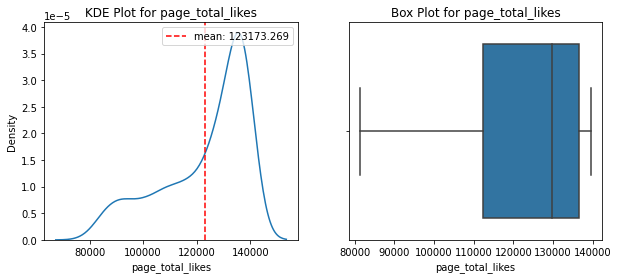

-------Statistics of page_total_likes-------
Median   : 129600.0
Max      : 139441
Min      : 81370
q1       : 112324.0
q3       : 136393.0
outliers : 0 (0.0%)



In [23]:
# Univariate Analysis
numerical_univariate(var_name="page_total_likes",
                     data=facebook_df)

**Summary**
- The distribution is skewed positively (to the right)
- There are no outliers in the data

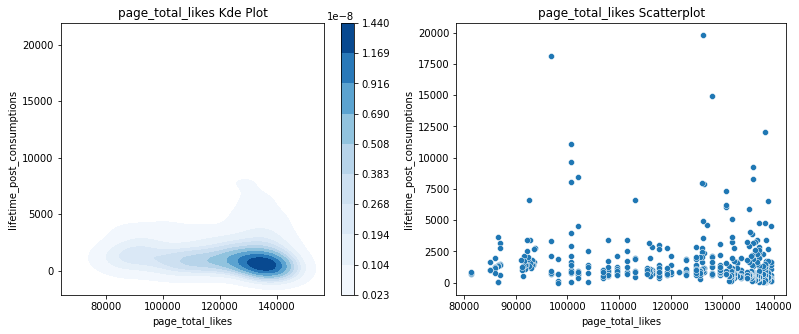

In [24]:
# Bivariate Analysis
numerical_bivariate(input_var="page_total_likes",
                    target_var="lifetime_post_consumptions",
                    data=facebook_df)

**Summary**

### **5.2 Paid**

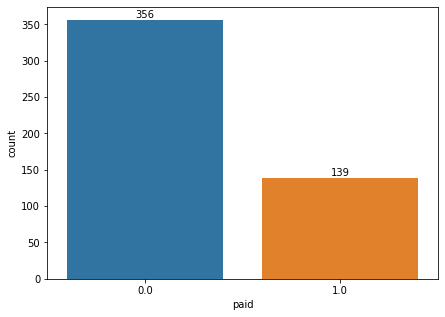

In [25]:
# univariate analysis
categorical_univariate(var_name="paid",
                       data=facebook_df)

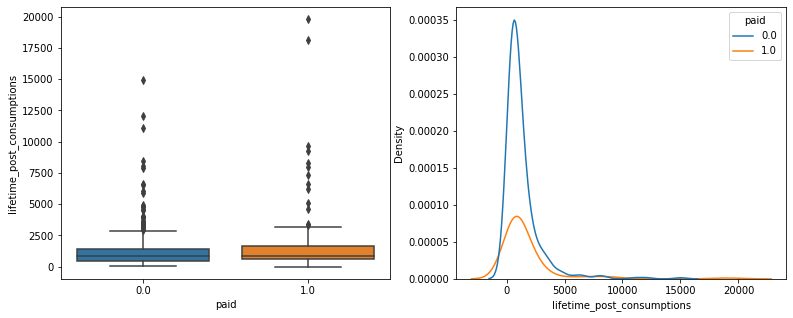

----Statistics of lifetime_post_consumptions when paid is 0.0----
Median   : 837.0
Max      : 14974
Min      : 19
q1       : 486.75
q3       : 1425.5
outliers : 33 (9.27%)

----Statistics of lifetime_post_consumptions when paid is 1.0----
Median   : 874.0
Max      : 19779
Min      : 9
q1       : 597.5
q3       : 1676.0
outliers : 13 (9.353%)



In [26]:
# Bivariate Analysis
categorical_bivariate(input_var="paid",
                      target_var="lifetime_post_consumptions",
                      data=facebook_df)

**Summary**
- The distribution of lifetime post consumptions for both paid or not are skewed negatively. 
- There are outliers for each lifetime post consumptions when paid variable is 0 or 1. The outliers are from the lifetime_post_consumptions.

### **5.3 Lifetime Post Consumptions**

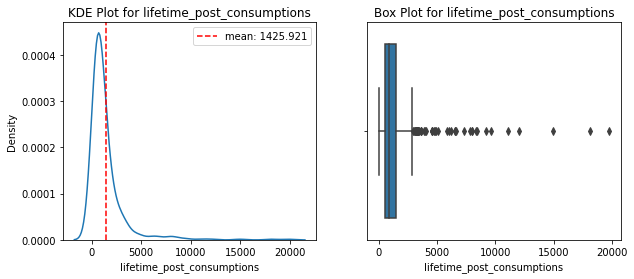

-------Statistics of lifetime_post_consumptions-------
Median   : 861.0
Max      : 19779
Min      : 9
q1       : 512.5
q3       : 1479.0
outliers : 48 (9.697%)



In [27]:
numerical_univariate(var_name="lifetime_post_consumptions",
                     data=facebook_df)

**Notes** 
- The outliers are still under 10% of our total data. Dropping all of the outliers would be harsh. Instead we would like to drop only 5% of the outliers, which means dropping around 50% of the outliers data.
- To select which outliers to drop we would investigate the distribution of the outlier data.

In [28]:
# Get outliers data
outliers = find_outliers(var_name="lifetime_post_consumptions",
                         data=facebook_df)

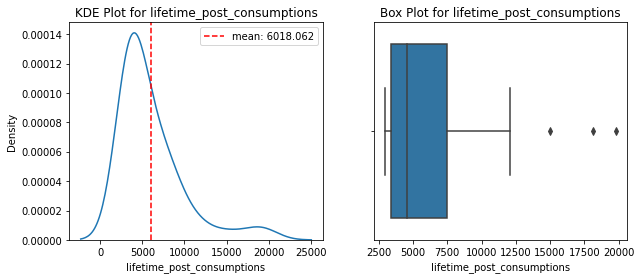

-------Statistics of lifetime_post_consumptions-------
Median   : 4573.0
Max      : 19779
Min      : 2969
q1       : 3394.0
q3       : 7458.75
outliers : 3 (6.25%)



In [29]:
# Find the distributions of the outliers
numerical_univariate(var_name="lifetime_post_consumptions",
                     data=outliers)

**Summary**
- The outliers are also have outliers.
- The outliers distribution is skewed to the right
- From this distribution we would like to drop the outliers that have a value more than its median of the outliers data. Which means we dropped 50% of the total current outliers data

#### **5.3.1 Dropping Outliers**

In [30]:
# Get the the median
med = outliers["lifetime_post_consumptions"].median()

# Get the dropped outliers data
dropped_outliers = outliers[outliers["lifetime_post_consumptions"] > med]

In [31]:
# Dropping outliers on the whole data
facebook_df.drop(dropped_outliers.index, inplace=True)

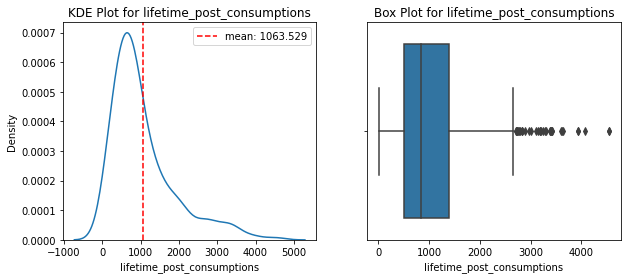

-------Statistics of lifetime_post_consumptions-------
Median   : 832.0
Max      : 4550
Min      : 9
q1       : 499.0
q3       : 1384.0
outliers : 35 (7.431%)



In [32]:
# Verify the data distribution
numerical_univariate(var_name="lifetime_post_consumptions",
                     data=facebook_df)

**Notes** Despite having removing the outliers we keep getting outliers, this is normal because the skewedness of our data is too steep, hence there would be more outliers coming until the mean is moving to the center.

### **5.3 Correlation Analysis**

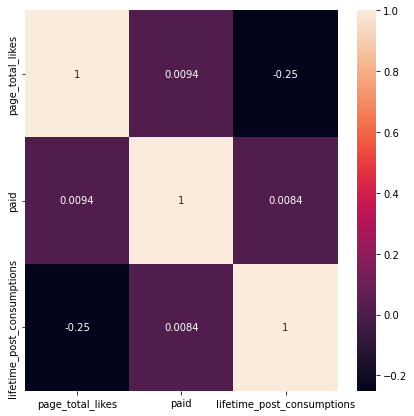

In [33]:
# Get correlation heatmap for the independent variables and the response only
selected_var = ["page_total_likes",
                "paid",
                "lifetime_post_consumptions"]

fig, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(facebook_df[selected_var].corr(), annot=True, data=facebook_df)
plt.show()

**Summary**
- The correlation between independent variables and the target is weak
- Also there is no sign of multicollinearity in between out independent variables.

## **6. Hypothesis Testing**

### **6.1 Hypothesis Testing: Page Total Likes**

Based on the correlation analysis, we've found that the relationship between page total likes and the lifetime post consumptions is negative, which means the less page total likes, the lifetime post consumptions is also less. From this information we could derive a hypothesis as follows:

> The average lifetime post consumption with page total likes less than its average would be lower than the average lifetime post consumption with page total likes higher that its average

with the average total page likes is 123173.269, we could create the following notation:

- $\mu_A$: The average lifetime post consumption with page total likes less than 123173
- $\mu_B$: The average lifetime post consumption with page total likes greater than 123173

Hence, we could develop the following null hypothesis
$$H_0:\mu_A \le \mu_B$$
$$H_A:\mu_A > \mu_B$$

From this we could define the test statistics:
- the significance or ($\alpha$) is 0.05
- The statistic test that would be used is **right-tail** t-test statistics test because we don't know the standard deviation of the population.

In [34]:
# Define the alpha
alpha = 0.05

# Define the average of page total likes
avg_page_total = facebook_df["page_total_likes"].mean()

# filter to group whether page total likes is less or greater than its average
filter_a = facebook_df["page_total_likes"] > avg_page_total
filter_b = facebook_df["page_total_likes"] < avg_page_total

mu_a = facebook_df[filter_a]["lifetime_post_consumptions"]
mu_b = facebook_df[filter_b]["lifetime_post_consumptions"]

before we run the test we need to check the variance between mu_a and mu_b

In [35]:
print("Variance mu_a: ", np.var(mu_a))
print("Variance mu_b: ", np.var(mu_b))

Variance mu_a:  682585.1869462798
Variance mu_b:  684348.3827156507


**Notes** Tha variance is almost the same, hence we would use the standard two sample t-test

In [36]:
# Running the t-test statistics
t_stat, p_value = ttest_ind(a=mu_a,
                            b=mu_b,
                            equal_var=True,
                            random_state=123,
                            alternative="greater")

print("t_stat: ", t_stat)
print("p-value: ", p_value) 

if p_value > alpha:
    print("Failed to reject the Null Hyptohesis\n")
else:
    print("Reject the Null Hypothesis\n")

print(f"p-value is {p_value} and alpha is {alpha}")

t_stat:  -4.261240481718212
p-value:  0.9999877085843641
Failed to reject the Null Hyptohesis

p-value is 0.9999877085843641 and alpha is 0.05


As we can see that p_value is greater than alpha which means we failed to reject the Null Hypothesis.

### **6.2 Hypothesis Testing: Paid variable and the lifetime post consumptions**

When the company paid Facebook (using Facebook ads) to promote their posts the lifetime post consumption should be greater than the lifetime post consumption without facebook ads because by using Facebook Ads, companies can have more people see the posts which can lead to consumers clicking like, share, comment, etc.

With that in mind, we could have the following hypothesis

> the lifetime post consumption should be grater than the the lifetime post consumption without facebook ads because by using Facebook Ads

From the assumption we could create the following notation:

- $\mu_A$: The average lifetime post consumption with that paid Facebook
- $\mu_B$: The average lifetime post consumption without paying Facebook

Hence, we could develop the following null hypothesis
$$H_0:\mu_A \ge \mu_B$$
$$H_A:\mu_A < \mu_B$$

From this we could define the test statistics:
- the significance or ($\alpha$) is 0.05
- The statistic test that would be used is **left-tail** t-test statistics test because we don't know the standard deviation of the population.

In [37]:
# define alpha
alpha = 0.05

# define filter
# filter to group whether page total likes is less or greater than its average
filter_a = facebook_df["paid"] == 1
filter_b = facebook_df["paid"] == 0

mu_a = facebook_df[filter_a]["lifetime_post_consumptions"]
mu_b = facebook_df[filter_b]["lifetime_post_consumptions"]

before we run the test we need to check the variance between mu_a and mu_b

In [38]:
print("Variance mu_a: ", np.var(mu_a))
print("Variance mu_b: ", np.var(mu_b))

Variance mu_a:  568730.4110717773
Variance mu_b:  762234.6071789816


The variance is not equal, hence we would use the Welch's t-test

In [39]:
# Running the t-test statistics
t_stat, p_value = ttest_ind(a=mu_a,
                            b=mu_b,
                            equal_var=True,
                            random_state=123,
                            alternative="less")

print("t_stat: ", t_stat)
print("p-value: ", p_value) 

if p_value > alpha:
    print("Failed to reject the Null Hyptohesis\n")
else:
    print("Reject the Null Hypothesis\n")

print(f"p-value is {p_value} and alpha is {alpha}")

t_stat:  0.1810100023739521
p-value:  0.571781040150655
Failed to reject the Null Hyptohesis

p-value is 0.571781040150655 and alpha is 0.05


As we can see that p_value is greater than alpha which means we failed to reject the Null Hypothesis.

## **7. Modelling with Linear Regression**

In [40]:
fb_model = ols("lifetime_post_consumptions ~ page_total_likes + paid",
               data=facebook_df)
fb_model_fit = fb_model.fit()

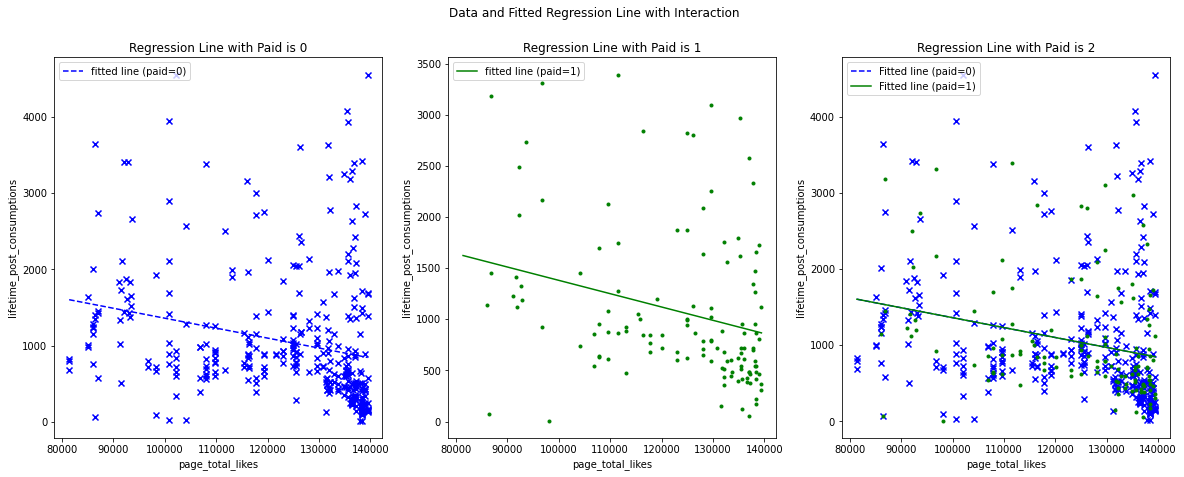

In [41]:
# Setup data
predictors = ["page_total_likes", "paid"]
target_var = "lifetime_post_consumptions"

fit_values = multiple_regression_line(target_var=target_var,
                                      predictors=predictors,
                                      data=facebook_df,
                                      model_fit=fb_model_fit)

**Summary**
- There is no substantial difference between slope at paid 0 and paid 1, hence we could interpret the coefficient directly. But we could directly interpret this regression model

In [42]:
regression_result(fb_model_fit)

,coef,std_error
Intercept,2662.255340,288.994238
page_total_likes,-0.013023,0.002320
paid,20.280763,84.730478


**Coefficient Interpretation**
$$\text{lifetime_post_consumptions} = 2457.41 - 0.012\text{page_total_likes} - 13\text{paid}$$

- The model predicts lifetime post consumptions that don't pay Facebook and has 0 page total likes is 2457.41
- The coefficient of paid: If we compare the lifetime post consumptions that have the same page total_likes but differs whether the company's paid facebook or not, the expected difference of the lifetime post consumptions is 13
- The coefficient of the page total likes: If we compare the lifetime post consumptions that paid facebook but differs 1 point in the paid total likes, the expected difference of lifetime post consumption is 0.012

**Conclusion**
- From this interpretation we could see that page total likes are contributing so little to the lifetime post consumption, although it would reduce its average. 
- On the other hand, whether the company is using Facebook or not the average of lifetime post consumption would reduce
-  the company might want to increase their total page likes because if it won’t increase their lifetime post consumption might also reduce from time to time.


### **7.1 Regression With Interaction**

In [43]:
model_int = ols("lifetime_post_consumptions ~ page_total_likes + paid + paid:page_total_likes",
                data=facebook_df)
model_int_fit = model_int.fit()

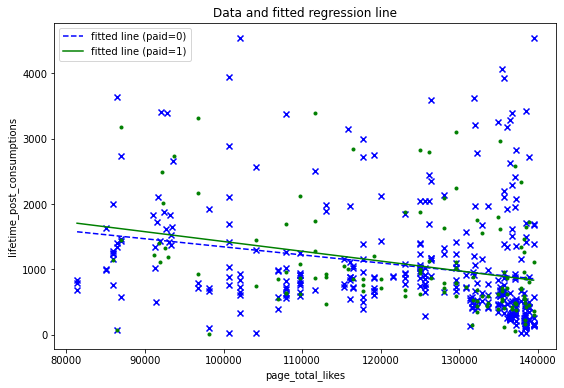

In [44]:
predictors = ["page_total_likes", "paid", "paid:page_total_likes"]
response = "lifetime_post_consumptions"
results = regression_result(model_fit=model_int_fit)

fit_value = multi_regression_interaction(target_var=response,
                                         predictors=predictors,
                                         data=facebook_df,
                                         model_fit=model_int_fit)

**Summary**
There is a slight difference in slope, which we can't see when we are not using interaction

In [45]:
regression_result(model_int_fit)

,coef,std_error
Intercept,2583.036763,331.758848
page_total_likes,-0.012380,0.002671
paid,345.244567,672.012869
paid:page_total_likes,-0.002634,0.005404


$$\text{lifetime_post_consumptions} = 2342.98 - 0.011\text{page_total_likes} + 464.12\text{paid} - 0.004\text{paid*page_total_likes}$$

**Interpretation**
$$\text{paid}=0, \text{lifetime_post_consumptions} = 2342.98 + 0.011\text{paid}$$
- The estimated difference between lifetime_post_consumptions that is not paid Facebook but differ 1 point in page_total_likes is 0.011

$$\text{paid}=1, \text{lifetime_post_consumptions} = 2807.1 + 0.015\text{paid}$$
- The estimated difference between lifetime_post_consumptions that is using paid Facebook but differ 1 point in page_total_likes is 0.015


**Conclusion**
there is no significant difference whether the company pays Facebook or not to promote their campaign towards the post consumption

### **7.2 Evaluation**

### **7.2.1 Evaluating Model without Interaction**

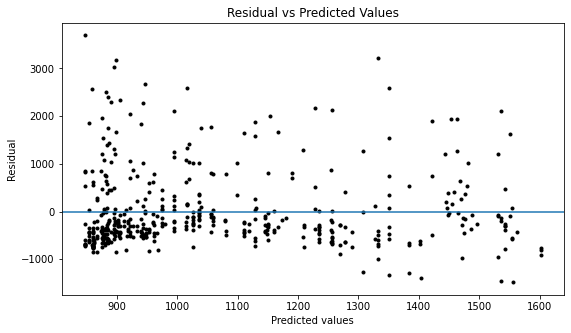

In [46]:
residual_plot(fb_model_fit)

In [47]:
fb_model_fit.rsquared

0.06313643873428232

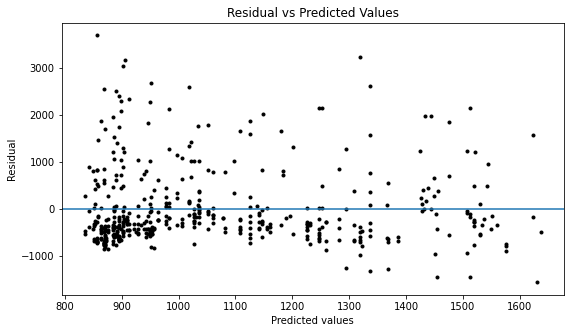

In [48]:
residual_plot(model_int_fit)

In [49]:
model_int_fit.rsquared

0.06361289646753976

**Summary**
- For both models (interaction and no interaction) The residual plot shows that the data is centered around the 0 line within 1 standard deviation. Although there is some data that is outside.
- The R squared for the model without interaction and with interaction are around 0.063, showing that the model is pretty accurate
